In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dataset = pd.read_csv('../../input/raman_spectroscopy_for_detecting_covid19/covid_and_healthy_spectra.csv')
ds2 = pd.read_csv('../../input/raman_spectroscopy_for_detecting_covid19/suspected_spectra.csv')
ds3 = pd.read_csv('../../input/raman_spectroscopy_for_detecting_covid19/tube_spectra.csv')

In [5]:
display(dataset.head().T, dataset.shape)

,0,1,2,3,4
400,0.0,0.0,0.0,0.0,0.0
402,-0.015237,-0.012098,-0.013,-0.015728,-0.020355
405,-0.030607,-0.028164,-0.029058,-0.034346,-0.045839
407,-0.038309,-0.035189,-0.035021,-0.04514,-0.060556
410,-0.039078,-0.036138,-0.034994,-0.047671,-0.065805
...,...,...,...,...,...
2108,0.001106,0.000583,0.001093,0.00042,0.001739
2109,0.001005,-0.000397,0.001058,0.000543,0.001946
2111,0.000117,-0.00016,0.000614,-0.000071,0.001301
2112,0.0,0.0,0.0,0.0,0.0


(309, 901)

In [28]:
display(ds2.head().T, ds3.head().T)

,0,1,2,3,4
400,0.000000,0.000000,0.000000,0.000000,0.000000
402,-0.004863,-0.012570,-0.006868,-0.011126,-0.009087
405,-0.015406,-0.030366,-0.023820,-0.025722,-0.022499
407,-0.022196,-0.043179,-0.033802,-0.035933,-0.030487
410,-0.022726,-0.047492,-0.037007,-0.040942,-0.034650
...,...,...,...,...,...
2107,0.000184,0.000958,0.001219,0.002063,0.001269
2108,-0.000057,0.001064,0.001850,0.001758,0.000616
2109,-0.000448,0.000160,0.001096,0.001447,-0.000050
2111,-0.000565,-0.000502,0.000519,0.001392,-0.000083


,0,1,2,3,4
400,0.000000,0.000000,0.000000,0.000000,0.000000
402,-0.040419,-0.044168,-0.042860,-0.038845,-0.035820
405,-0.091742,-0.093918,-0.090162,-0.069811,-0.048723
407,-0.119157,-0.124765,-0.116809,-0.080185,-0.046363
410,-0.132393,-0.134557,-0.124819,-0.080745,-0.053030
...,...,...,...,...,...
2107,0.002193,0.000210,0.001686,0.001107,0.002129
2108,0.001192,0.001196,0.002021,0.000951,0.003500
2109,0.001678,0.001575,0.001786,0.002548,0.001817
2111,0.002492,0.001002,0.000620,0.003894,0.000399


In [6]:
X = dataset.drop(['diagnostic'], axis=1)
X.columns = X.columns.astype(int)
y = dataset['diagnostic']

In [7]:
wavelength = X.columns
intensity = X.values

In [23]:
y.value_counts()

SARS-CoV-2    159
Healthy       150
Name: diagnostic, dtype: int64

In [33]:
unique_diagnostic = y.unique()

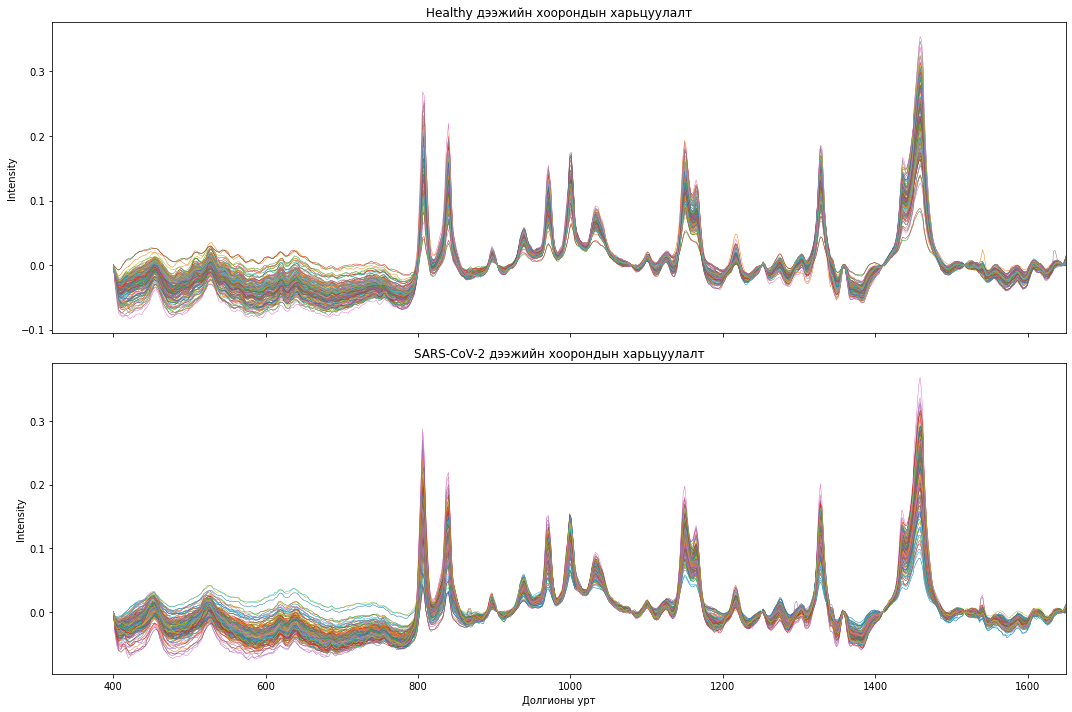

In [37]:
fig, axs = plt.subplots(len(unique_diagnostic), 1, sharex=True, figsize=(15, 10))

for i, diagnostic in enumerate(unique_diagnostic):
    filtered_intensity = intensity[y == diagnostic]

    for j in range(len(filtered_intensity)):
        axs[i].plot(wavelength, filtered_intensity[j], linewidth=0.5)
        axs[i].set_ylabel('Intensity')
    axs[i].set_title(f'{diagnostic} дээжийн хоорондын харьцуулалт')

axs[len(unique_diagnostic) - 1].set_xlabel('Долгионы урт')
plt.tight_layout()
plt.xlim(320, 1650)

plt.show()